<div dir="rtl" style="width:90%; margin:auto">
<ul><li>کد ناامن در C# به بخشی از کد گفته می‌شود که امکان دسترسی مستقیم به حافظه را فراهم می‌کند. این دسترسی مستقیم از طریق اشاره‌گرها انجام می‌شود.</li><li>برای استفاده از کد ناامن، باید بلوک‌های کد را با کلمه کلیدی <code>unsafe</code> مشخص کرد و همچنین کامپایلر باید با گزینه <code>/unsafe</code> تنظیم شود تا این کدها را کامپایل کند.</li></ul>

<li><p><strong>مزایا و کاربردها:</strong></p><ul><li><strong>تعامل با API‌های زبان C:</strong> کد ناامن به شما اجازه می‌دهد تا به سادگی با توابع و کتابخانه‌های نوشته شده در زبان C تعامل کنید. این کتابخانه‌ها ممکن است به صورت گسترده‌ای از اشاره‌گرها برای مدیریت حافظه استفاده کنند.</li><li><strong>دسترسی به حافظه خارج از heap مدیریت‌شده:</strong> اشاره‌گرها این امکان را فراهم می‌کنند که به حافظه خارج از heap مدیریت‌شده (مدیریت شده توسط CLR) دسترسی داشته باشید. این قابلیت در مواردی که نیاز به دسترسی سطح پایین به حافظه باشد، مفید است.</li><li><strong>بهبود عملکرد در نقاط حساس:</strong> در برخی موارد حساس به عملکرد، استفاده از اشاره‌گرها می‌تواند منجر به بهبود عملکرد شود. به عنوان مثال، در پردازش‌های سنگین و محاسبات پیچیده، دسترسی مستقیم به حافظه می‌تواند از نظر زمانی بهینه‌تر باشد.</li></ul></li>

<h3>اشاره‌گرها (Pointers)</h3>
<p><p><strong>تعریف اشاره‌گر:</strong></p><ul><li>اشاره‌گر نوعی متغیر است که به آدرس حافظه یک متغیر دیگر اشاره می‌کند. در کد ناامن، شما می‌توانید اشاره‌گرها را تعریف و استفاده کنید.</li></ul></p>

</div>

In [ ]:
<!-- زمانی که میخواهم کد نام امن بنویسیم باید اجازه کد نا امن را فعال کنیم -->
<PropertyGroup>
  <OutputType>Exe</OutputType>
  <TargetFramework>net6.0</TargetFramework>
  <ImplicitUsings>enable</ImplicitUsings>
  <Nullable>enable</Nullable>
  <AllowUnsafeBlocks>true</AllowUnsafeBlocks>
</PropertyGroup>

In [ ]:
unsafe
{
    int* p;
    int number = 5;
    p = &number;  // p حالا به آدرس حافظه متغیر number اشاره می‌کند.

    // گرفتن مقدار یک آدرس
    int value = *p;  // مقدار value برابر با مقدار number خواهد بود.
    // value is 5
}


### Pointer Basics

For every ***value type*** or ***reference type*** `V`, there is a corresponding **pointer** type `V*`.  
A ***pointer instance*** holds the `address of a variable`.   
   
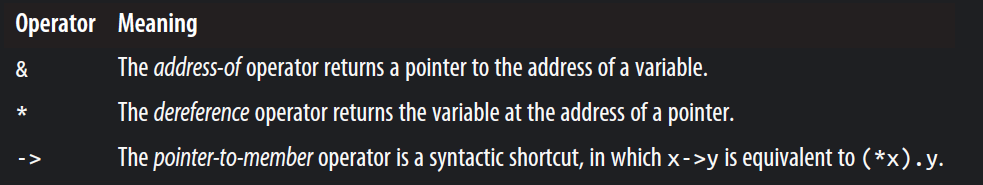

In [1]:
using System;

public struct Point
{
    public int X;
    public int Y;
}


    
unsafe
{
    Point point = new Point();
    Point* p = &point;
    p->X = 10; // equal to (*p).X
    p->Y = 20; // equal to (*p).Y

    Console.WriteLine($"X: {p->X}, Y: {p->Y}");
            
    Console.WriteLine($"X: {(*p).X}, Y: {(*p).Y}");
}
    



X: 10, Y: 20
X: 10, Y: 20


<div dir="rtl" style="width:90%; margin:auto">

<p>هنگامی که یک عدد صحیح را به یک اشاره‌گر اضافه می‌کنید یا از آن کم می‌کنید، نتیجه یک اشاره‌گر جدید است که به مکانی در حافظه اشاره می‌کند که به اندازه‌ی آن عدد صحیح جابه‌جا شده است. این عملیات بر اساس اندازه نوع داده‌ای است که اشاره‌گر به آن اشاره می‌کند.</p>
</div>

In [2]:
unsafe
{
    int[] numbers = { 1, 2, 3, 4, 5 };
    fixed (int* p = &numbers[0])
    {
        int* p2 = p + 2;
        Console.WriteLine(*p2); // خروجی: 3
    }
}


3


<div dir="rtl" style="width:90%; margin:auto">
<p>هنگامی که دو اشاره‌گر از یک نوع را از هم تفریق می‌کنید، نتیجه یک عدد صحیح است که نشان‌دهنده فاصله (به تعداد عناصر) بین دو اشاره‌گر است. این عملیات معمولاً برای محاسبه فاصله بین دو اشاره‌گر استفاده می‌شود.</p>
</div>

In [1]:
unsafe
{
    int[] numbers = { 1, 2, 3, 4, 5 };
    fixed (int* p1 = &numbers[0], p2 = &numbers[3])
    {
        long distance = p2 - p1; 
        /*در هر دو سیستم 32 بیتی و 64 بیتی،
         نتیجه تفریق دو اشاره‌گر یک عدد صحیح 64 بیتی (long) است. 
        */
        Console.WriteLine(distance); // خروجی: 3
    }
}


3


<div dir="rtl" style="width:90%; margin:auto">
<p>کلمه کلیدی <code>fixed</code> در C# برای جلوگیری از جابه‌جا شدن اشیاء مدیریت‌شده توسط گاربیج کالکتور (Garbage Collector) استفاده می‌شود. هنگامی که شما به طور مستقیم با حافظه غیرمدیریتی (unsafe code) کار می‌کنید و نیاز دارید که آدرس یک شیء مدیریت‌شده را به یک اشاره‌گر تبدیل کنید، باید از کلمه کلیدی <code>fixed</code> استفاده کنید تا اطمینان حاصل کنید که گاربیج کالکتور آن شیء را جابه‌جا نمی‌کند.</p>
</div>

### Unsafe Code

By marking a `type`, `type member`, or `statement block` with the ***unsafe*** keyword, you’re permitted to use pointer types

In [ ]:
unsafe void BlueFilter (int[,] bitmap) // فیلتر آبی
{
    int length = bitmap.Length;
    fixed (int* b = bitmap)
    {
        int* p = b;
        for (int i = 0; i < length; i++)
            *p++ &= 0xFF; 
            // تنها 8 بیت کم ارزش (LSB) هر مقدار حفظ می‌شود و بقیه بیت‌ها صفر می‌شوند.
    }
}

//Unsafe code can run faster than a corresponding safe implementation.

In the case of ***arrays*** and ***strings***, the pointer will actually `point` to the `first element`, **which is a value type**.

### The stackalloc Keyword

<div dir="rtl" style="width:90%; margin:auto">
<p><code>stackalloc</code> یک کلمه کلیدی در C# است که به شما اجازه می‌دهد حافظه‌ای را به صورت مستقیم بر روی پشته (stack) تخصیص دهید. این تخصیص حافظه بسیار سریع است زیرا تنها نیاز به تنظیم یک اشاره‌گر پشته دارد.</p>

<h4>ویژگی‌های <code>stackalloc</code></h4>

<ol><li><p><strong>تخصیص حافظه بر روی پشته:</strong></p><ul><li><code>stackalloc</code> حافظه را بر روی پشته تخصیص می‌دهد، برخلاف تخصیص حافظه بر روی heap که توسط گاربیج کالکتور مدیریت می‌شود.</li></ul></li><li><p><strong>طول عمر محدود:</strong></p><ul><li>حافظه تخصیص داده شده توسط <code>stackalloc</code> تا زمانی معتبر است که متدی که از آن استفاده کرده‌اید در حال اجرا است. به محض خروج از متد، حافظه به طور خودکار آزاد می‌شود، مشابه متغیرهای محلی.</li></ul></li><li><p><strong>عدم مدیریت توسط گاربیج کالکتور:</strong></p><ul><li>از آنجایی که این حافظه بر روی پشته تخصیص داده می‌شود، گاربیج کالکتور نقشی در مدیریت آن ندارد و این باعث می‌شود که عملکرد بهتری داشته باشد زیرا نیاز به هیچ عملیات جمع‌آوری زباله‌ای نیست.</li></ul></li></ol>
</div>

In [ ]:
unsafe
{
    int* numbers = stackalloc int[10];
    //int[] numbers = new int[10]; در اینجا آرایه بر روی heap قرار می گرفت
    for (int i = 0; i < 10; i++)
    {
        numbers[i] = i * 2; // مقداردهی به عناصر آرایه
    }

    for (int i = 0; i < 10; i++)
    {
        Console.WriteLine(numbers[i]); // چاپ مقادیر آرایه
    }
}


### Fixed-Size Buffers

The fixed keyword has another use, which is to ***create fixed-size buffers*** within
`structs`, this can be useful when calling an unmanaged function

In [ ]:
unsafe struct UnsafeUnicodeString
{
    public short Length;
    public fixed byte Buffer[30]; // Allocate block of 30 bytes
    // این یک آرایه نیست بلکه 30 بایت از حافظه است که پشت سر هم رزرو شده اند
   /*Buffer 
   شامل ۳۰ بایت است که به‌صورت مستقیم در داخل ساختار 
   UnsafeUnicodeString
    ذخیره شده‌اند، نه به عنوان یک مرجع به 
    heap.*/
    // اگر می داشتیم 
   // public int[] Buffer; // خود بافر یک object بود، روی heap
}

unsafe class UnsafeClass
{
    UnsafeUnicodeString uus;
    public UnsafeClass (string s)
    {
        uus.Length = (short)s.Length;
        fixed (byte* p = uus.Buffer)
        for (int i = 0; i < s.Length; i++)
            p[i] = (byte) s[i];
    }
}

### void*

تا الان اگر اشاره گری می خواستیم تعریف کنیم باید نوع آن اشاره گر را معرفی میکردیم مثلا:  

In [ ]:
unsafe
{
    int* p;
    byte* b;
    //...
}

حال اگر بخواهیم فقط مکان حافظه بدون در نظر گرفتن نوع آن را پاس دهیم چکار باید بکنیم؟

In [ ]:
short[] a = { 1, 1, 2, 3, 5, 8, 13, 21, 34, 55 };

unsafe void Zap (void* memory, int byteCount)
{
    byte* b = (byte*)memory; // برای استفاده حتما باید به یک نوع تبدیل شود
    for (int i = 0; i < byteCount; i++)
        *b++ = 0;
}

unsafe
{
    fixed (short* p = a)
    {
        //sizeof returns size of value-type in bytes
        Zap (p, a.Length * sizeof (short));
    }
}

foreach (short x in a)
    System.Console.WriteLine (x); // Prints all zeros

### Native-Sized Integers

The `nint` and `nuint` ***native-sized integer types*** (introduced in C# 9) are `sized` to match the `address space` of the process at `runtime` (in practice, 32 or 64 bits).

#### 1. Efficiency  
when you ***subtract*** `two pointers` in C#, the result is always a `64-bit integer` (**long**), which is **inefficient** on `32-bit platforms`.

In [ ]:
unsafe nint AddressDif(char* x, char* y) => (nint)x - (nint)y;

<div dir="rtl" style="width:90%; margin:auto">
<h4>۲. ایمنی در برابر سرریز و راحتی (Overflow Safety and Convenience)</h4>
<p>استفاده از <code>nint</code> و <code>nuint</code> برای نمایندگی آفست (offset) در حافظه یا طول بافر (buffer length) می‌تواند ایمنی و راحتی را افزایش دهد. در گذشته، از <code>System.IntPtr</code> و <code>System.UIntPtr</code> برای این منظور استفاده می‌شد که این نوع داده‌ها برای پوشش دادن اشاره‌گرها یا هندل‌های سیستم‌عامل طراحی شده‌اند و از پشتیبانی محدودی برای عملیات حسابی برخوردارند. همچنین، عملیات حسابی آنها بدون بررسی سرریز انجام می‌شود.</p>
</div>

In [ ]:
nint x = 123, y = 234;
checked
{
    nint sum = x + y, product = x * y;
    Console.WriteLine(product);
}
/*
بلوک checked
 تضمین می‌کند که هر گونه سرریز در عملیات حسابی درون بلوک تشخیص داده شود و 
 استثنا (exception) 
 پرتاب شود. این به معنای ایمنی در برابر سرریز است.
*/

<div dir="rtl" style="width:90%; margin:auto">
<p><code>int</code> همیشه ۳۲ بیت است، صرف‌نظر از اینکه سیستم ۳۲ بیتی یا ۶۴ بیتی باشد.</p>
<p><code>nint</code> اندازه‌ای دارد که با معماری سیستم هماهنگ است؛ یعنی در سیستم‌های ۳۲ بیتی، ۳۲ بیت و در سیستم‌های ۶۴ بیتی، ۶۴ بیت است.</p>

<p><p><strong>کارایی و بهینه‌سازی</strong>:</p><ul><li>در سیستم‌های ۶۴ بیتی، استفاده از <code>nint</code> می‌تواند کارایی بهتری داشته باشد زیرا اندازه آن با اندازه آدرس‌های حافظه همخوانی دارد و عملیات حسابی با اندازه بومی سیستم انجام می‌شود.</li><li>در سیستم‌های ۳۲ بیتی، <code>nint</code> اندازه ۳۲ بیتی دارد که با اندازه طبیعی پردازنده همخوانی دارد و در نتیجه عملیات حسابی بهینه‌تری انجام می‌شود.</li></ul></p>
</div>

### Function Pointers

<div dir="rtl" style="width:90%; margin:auto">

اشاره‌گرهای تابع در C# 9 معرفی شده‌اند و عملکردی مشابه به نماینده‌ها (delegates) دارند، اما با تفاوت‌هایی که باعث می‌شوند کارایی و سادگی بیشتری در تعامل با API‌های غیرمدیریت‌شده (unmanaged APIs) فراهم کنند. 
</div>

In [ ]:
delegate*<int, char, string, void>  // (void refers to the return type)

In [ ]:
void SomeFunction (int x, char y, string z){}

In [7]:
unsafe
{
    delegate*<string, int> functionPointer = &GetLength;
    int length = functionPointer ("Hello, world");
    Console.Write(length);


    static int GetLength (string s) => s.Length;
}

12

In this example, ***functionPointer*** is `not an object` upon which you can call a
method `such as Invoke` (or with a reference to a Target object). Instead, it’s a
variable that **points** `directly` to the `target method’s address in memory`

In [8]:
unsafe
{
    delegate*<string, int> functionPointer = &GetLength;
    
    Console.WriteLine ((uint)functionPointer);

    static int GetLength (string s) => s.Length;
}

2253631344


<div dir="rtl" style="width:90%; margin:auto">

<p><p><strong>تنها برای متدهای ایستا (Static Methods)</strong>:</p><ul><li>اشاره‌گرهای تابع فقط می‌توانند به متدهای ایستا اشاره کنند. این محدودیت به این دلیل است که اشاره‌گرهای تابع باید بدون نیاز به نمونه‌ای از کلاس، به متد دسترسی داشته باشند.</li></ul></p>

<p><p><strong>عدم قابلیت چندپخشی (Multicast)</strong>:</p><ul><li>نماینده‌ها می‌توانند به چندین متد اشاره کنند و به صورت چندپخشی (multicast) عمل کنند، اما اشاره‌گرهای تابع این قابلیت را ندارند. آن‌ها فقط به یک متد اشاره می‌کنند.</li></ul></p>
</div>

### [SkipLocalsInit]

<div dir="rtl" style="width:90%; margin:auto">
<p>هنگامی که C# یک متد را کامپایل می‌کند، به طور پیش‌فرض یک فلگ (flag) را تنظیم می‌کند که به زمان اجرای .NET (runtime) دستور می‌دهد تا تمامی متغیرهای محلی متد را به مقادیر پیش‌فرض‌شان مقداردهی اولیه کند. این معمولاً به معنای صفر کردن حافظه است. این کار برای اطمینان از اینکه متغیرهای محلی حاوی داده‌های تصادفی و ناخواسته نباشند انجام می‌شود.</p>

<h4><code>[SkipLocalsInit]</code> Attribure</h4>
<p>از نسخه C# 9، می‌توانید به کامپایلر بگویید که این فلگ را تنظیم نکند و از مقداردهی اولیه متغیرهای محلی صرف‌نظر کند. این کار با استفاده از ویژگی <code>[SkipLocalsInit]</code> انجام می‌شود که در فضای نام <code>System.Runtime.CompilerServices</code> قرار دارد.</p>

<ul><li>در برخی سناریوهای خاص، صفر کردن حافظه می‌تواند زمان‌بر باشد، به خصوص در متدهایی که تعداد زیادی متغیر محلی دارند یا در متدهای پرفورمنس حساس.</li><li>با صرف‌نظر کردن از مقداردهی اولیه متغیرهای محلی، می‌توان این هزینه اضافی را حذف کرد و کارایی را بهبود بخشید.</li></ul>
</div>